# Problem Statement

Your goal is to develop an intelligent and user-friendly Streamlit web application that leverages clickstream data to enhance customer engagement and drive sales.

The application should:

1. Classification Problem: Predict whether a customer will complete a purchase (1) or not (2) based on their browsing behavior.
2. Regression Problem: Estimate the potential revenue a customer is likely to generate, helping the business forecast revenue and optimize marketing strategies.
3. Clustering Problem: Segment customers into distinct groups based on their online behavior patterns, enabling targeted marketing campaigns and personalized product recommendations.

By building this application, you aim to empower the business with data-driven insights to increase conversions, boost revenue, and enhance customer satisfaction

## Data Extraction

In [59]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [60]:
train_click = pd.read_csv('train_data.csv')
test_click = pd.read_csv('test_data.csv')

## Understanding the Data

In [61]:
train_click.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [62]:
test_click.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,4,22,4,29,5279,4,P48,9,4,2,33,2,3
1,2008,5,19,1,29,10059,1,A15,14,5,2,33,2,1
2,2008,4,11,10,29,2919,4,P23,6,2,2,28,2,2
3,2008,4,28,3,27,6304,2,B24,11,2,1,57,1,2
4,2008,5,26,1,29,11266,1,A2,3,1,1,43,2,1


In [63]:
train_click.shape

(132379, 14)

In [64]:
test_click.shape

(33095, 14)

In [65]:
train_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [66]:
test_click.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33095 entries, 0 to 33094
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  33095 non-null  int64 
 1   month                 33095 non-null  int64 
 2   day                   33095 non-null  int64 
 3   order                 33095 non-null  int64 
 4   country               33095 non-null  int64 
 5   session_id            33095 non-null  int64 
 6   page1_main_category   33095 non-null  int64 
 7   page2_clothing_model  33095 non-null  object
 8   colour                33095 non-null  int64 
 9   location              33095 non-null  int64 
 10  model_photography     33095 non-null  int64 
 11  price                 33095 non-null  int64 
 12  price_2               33095 non-null  int64 
 13  page                  33095 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 3.5+ MB


In [67]:
train_click.duplicated().sum()

0

In [68]:
test_click.duplicated().sum()

0

In [69]:
train_click.isna().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [70]:
test_click.isna().sum()

year                    0
month                   0
day                     0
order                   0
country                 0
session_id              0
page1_main_category     0
page2_clothing_model    0
colour                  0
location                0
model_photography       0
price                   0
price_2                 0
page                    0
dtype: int64

In [71]:
train_click.describe()

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,132379.0,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000,132379.000000
mean,2008.0,5.582759,14.507671,9.811314,26.949629,12038.722063,2.400426,6.227393,3.261106,1.260026,43.788191,1.488484,1.712137
std,0.0,1.328064,8.829106,13.458937,7.153071,7012.460866,1.145004,4.238354,1.714058,0.438650,12.539390,0.499869,0.983699
min,2008.0,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,5905.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,6.000000,29.000000,11931.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18212.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,195.000000,47.000000,24026.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [72]:
train_click.skew(axis=0,numeric_only=True)

year                   0.000000
month                  0.266242
day                    0.179198
order                  4.466186
country               -1.386055
session_id             0.008814
page1_main_category    0.110652
colour                 0.611017
location               0.142249
model_photography      1.094163
price                  0.524068
price_2                0.046077
page                   1.373365
dtype: float64

In [73]:
test_click.describe()

,year,month,day,order,country,session_id,page1_main_category,colour,location,model_photography,price,price_2,page
count,33095.0,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000,33095.000000
mean,2008.0,5.598399,14.592083,9.842121,26.964587,12137.196435,2.402508,6.228705,3.246563,1.260251,43.859767,1.486901,1.702281
std,0.0,1.328492,8.835255,13.556204,7.141260,6991.778800,1.142095,4.224662,1.709769,0.438778,12.583063,0.499836,0.977223
min,2008.0,4.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000
25%,2008.0,4.000000,7.000000,2.000000,29.000000,6031.000000,1.000000,3.000000,2.000000,1.000000,33.000000,1.000000,1.000000
50%,2008.0,5.000000,14.000000,5.000000,29.000000,12084.000000,2.000000,4.000000,3.000000,1.000000,43.000000,1.000000,1.000000
75%,2008.0,7.000000,22.000000,12.000000,29.000000,18259.000000,3.000000,9.000000,5.000000,2.000000,52.000000,2.000000,2.000000
max,2008.0,8.000000,31.000000,194.000000,47.000000,24023.000000,4.000000,14.000000,6.000000,2.000000,82.000000,2.000000,5.000000


In [74]:
test_click.skew(axis=0,numeric_only=True)

year                   0.000000
month                  0.244855
day                    0.161333
order                  4.479146
country               -1.369317
session_id            -0.008982
page1_main_category    0.112690
colour                 0.609930
location               0.158219
model_photography      1.092870
price                  0.514673
price_2                0.052415
page                   1.385449
dtype: float64

In [75]:
for x in train_click.columns:
    print(f"{x} - {train_click[x].nunique()}")

year - 1
month - 5
day - 31
order - 193
country - 46
session_id - 22910
page1_main_category - 4
page2_clothing_model - 216
colour - 14
location - 6
model_photography - 2
price - 20
price_2 - 2
page - 5


In [76]:
for x in test_click.columns:
    print(f"{x} - {test_click[x].nunique()}")

year - 1
month - 5
day - 31
order - 162
country - 40
session_id - 14034
page1_main_category - 4
page2_clothing_model - 214
colour - 14
location - 6
model_photography - 2
price - 20
price_2 - 2
page - 5


## Data Analysis (EDA)

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
train_click_analyze = train_click.copy()

In [79]:
train_click_analyze.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [80]:
country_mapping = {
    1:"Australia",
    2:"Austria",
    3:"Belgium",
    4:"British Virgin Islands",
    5:"Cayman Islands",
    6:"Christmas Island",
    7:"Croatia",
    8:"Cyprus",
    9:"Czech Republic",
    10:"Denmark",
    11:"Estonia",
    12:"unidentified",
    13:"Faroe Islands",
    14:"Finland",
    15:"France",
    16:"Germany",
    17:"Greece",
    18:"Hungary",
    19:"Iceland",
    20:"India",
    21:"Ireland",
    22:"Italy",
    23:"Latvia",
    24:"Lithuania",
    25:"Luxembourg",
    26:"Mexico",
    27:"Netherlands",
    28:"Norway",
    29:"Poland",
    30:"Portugal",
    31:"Romania",
    32:"Russia",
    33:"San Marino",
    34:"Slovakia",
    35:"Slovenia",
    36:"Spain",
    37:"Sweden",
    38:"Switzerland",
    39:"Ukraine",
    40:"United Arab Emirates",
    41:"United Kingdom",
    42:"USA",
    43:"biz (.biz)", 
    44:"com (.com)",
    45:"int (.int)", 
    46:"net (.net)",
    47:"org (*.org)"
}
train_click_analyze.country = train_click_analyze.country.replace(country_mapping)

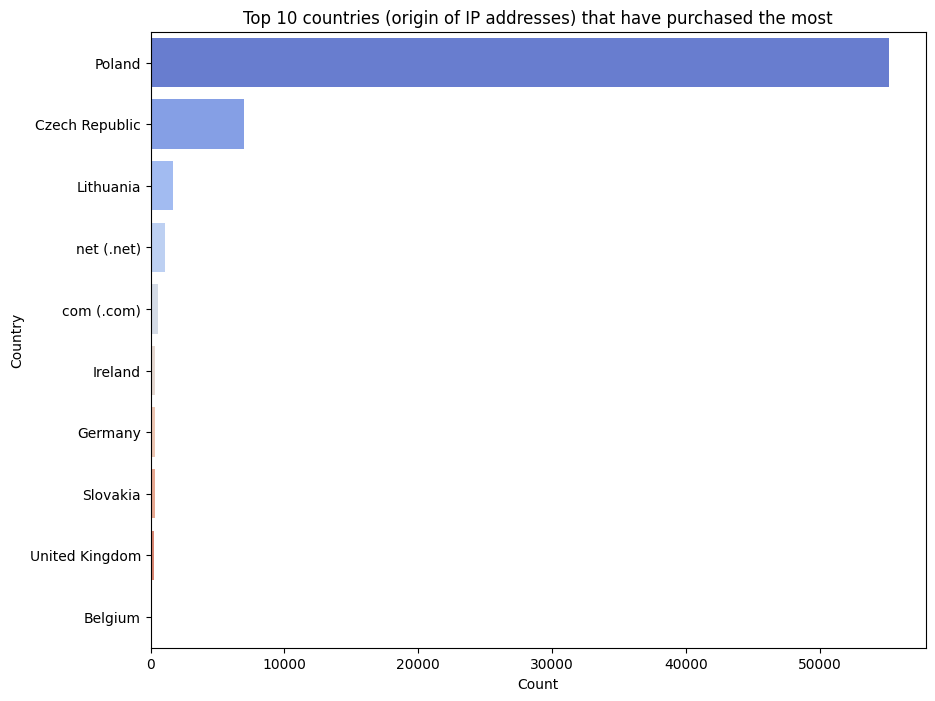

In [81]:
country_10 = pd.DataFrame(train_click_analyze[train_click_analyze['price_2']==1].country.value_counts())
country_10.reset_index(inplace=True)
country_10.rename(columns={'index':'Country','country':'Count'},inplace=True)
country_10 = country_10.head(10)
plt.figure(figsize=(10,8))
sns.barplot(country_10,x='Count',y = 'Country',hue='Country',palette='coolwarm')
plt.title('Top 10 countries (origin of IP addresses) that have purchased the most')
plt.show()

In [82]:
product_category = {
    1:"trousers",
    2:"skirts",
    3:"blouses",
    4:"sale"
}
train_click_analyze.page1_main_category = train_click_analyze.page1_main_category.replace(product_category)

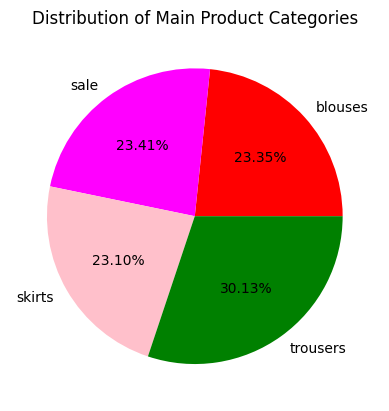

In [83]:
prod_cat = train_click_analyze.groupby('page1_main_category').agg(count=('page1_main_category','count'))
categ = prod_cat.index.to_list()
values = prod_cat.values.reshape(1,-1).tolist()[0]
plt.pie(values,labels=categ,colors=['red','magenta','pink','green'],autopct="%1.2f%%")
plt.title('Distribution of Main Product Categories')
plt.show()

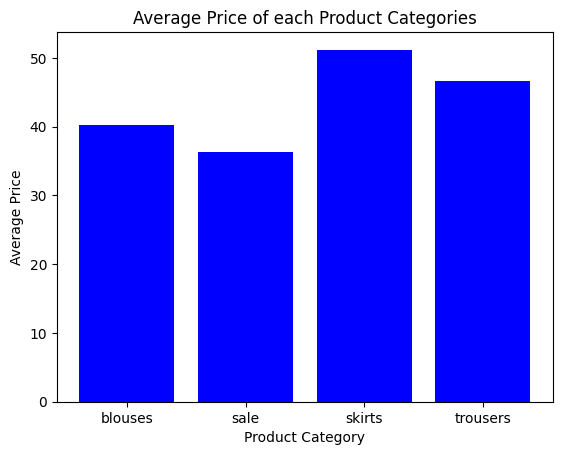

In [84]:
prod_cat = train_click_analyze.groupby('page1_main_category').agg(average_price=('price','mean'))
categ = prod_cat.index.to_list()
values = prod_cat.values.reshape(1,-1).tolist()[0]
plt.bar(categ,values,color='blue')
plt.xlabel('Product Category')
plt.ylabel('Average Price')
plt.title('Average Price of each Product Categories')
plt.show()

In [85]:
color_mapping = {
    1:"beige",
    2:"black",
    3:"blue",
    4:"brown",
    5:"burgundy",
    6:"gray",
    7:"green",
    8:"navy blue",
    9:"of many colors",
    10:"olive",
    11:"pink",
    12:"red",
    13:"violet",
    14:"white"
}
train_click_analyze.colour = train_click_analyze.colour.replace(color_mapping)

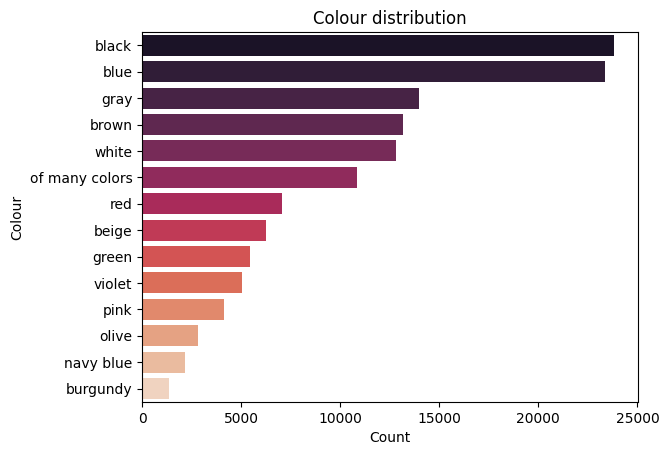

In [86]:
color_dis = pd.DataFrame(train_click_analyze.colour.value_counts())
color_dis.reset_index(inplace=True)
color_dis.rename(columns={'index':'Colour','colour':'Count'},inplace=True)
sns.barplot(color_dis,x='Count',y='Colour',hue='Colour',palette='rocket')
plt.title('Colour distribution')
plt.show()

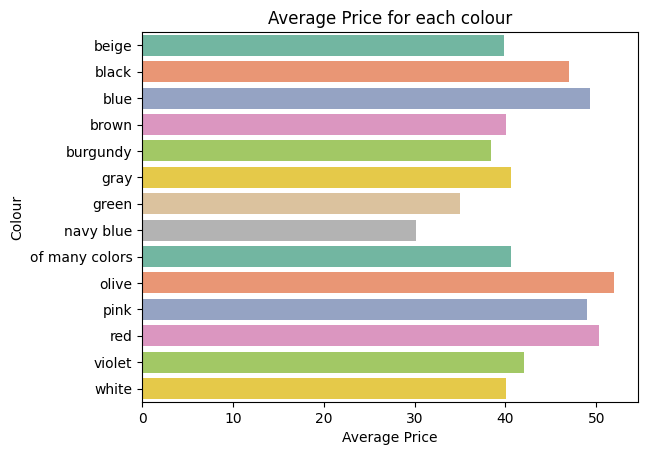

In [87]:
color_dis = pd.DataFrame(train_click_analyze.groupby('colour').agg(avg_price=('price','mean')))
color_dis.reset_index(inplace=True)
sns.barplot(color_dis,x='avg_price',y='colour',hue='colour',palette='Set2')
plt.ylabel('Colour')
plt.xlabel('Average Price')
plt.title('Average Price for each colour')
plt.show()

In [88]:
loc_mapping = {
    1:"top left",
    2:"top in the middle",
    3:"top right",
    4:"bottom left",
    5:"bottom in the middle",
    6:"bottom right"
}
train_click_analyze.location = train_click_analyze.location.replace(loc_mapping)

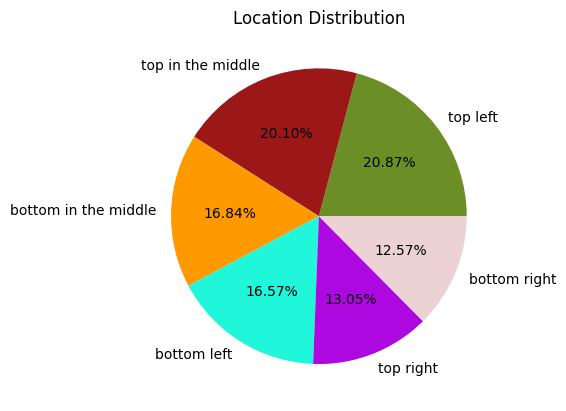

In [89]:
loc_dis = pd.DataFrame(train_click_analyze.location.value_counts())
categ = loc_dis.index.to_list()
values = loc_dis.values.reshape(1,-1).tolist()[0]
plt.pie(values,labels=categ,colors=['#6B8F26','#9C1718','#FE9900','#1FF6DA','#AE08E1','#ECD1D5'],autopct="%1.2f%%")
plt.title('Location Distribution')
plt.show()

In [90]:
model_phot = {
    1:"en face",
    2:"profile"
}
train_click_analyze.model_photography = train_click_analyze.model_photography.replace(model_phot)

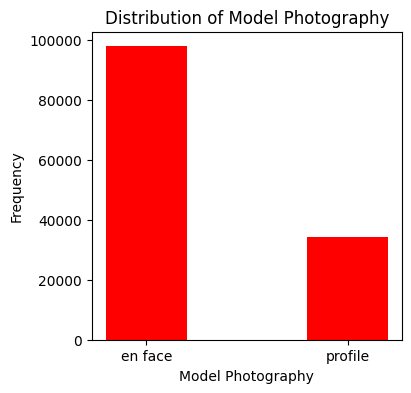

In [91]:
model_photos = pd.DataFrame(train_click_analyze.groupby('model_photography').agg(count=('model_photography','count')))
categ = model_photos.index.to_list()
values = model_photos.values.reshape(1,-1).tolist()[0]
plt.figure(figsize=(4,4))
plt.bar(categ,values,color='red',width=0.4)
plt.xlabel('Model Photography')
plt.ylabel('Frequency')
plt.title('Distribution of Model Photography')
plt.show()

In [92]:
purch = {1:'Yes',2:'No'}
train_click_analyze.price_2 = train_click_analyze.price_2.replace(purch)

In [93]:
train_click_analyze.head()

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,Poland,15648,blouses,C20,violet,top left,profile,48,Yes,2
1,2008,5,19,6,Poland,10018,skirts,B26,violet,top right,en face,57,Yes,2
2,2008,7,15,2,Poland,19388,blouses,C13,of many colors,bottom in the middle,en face,48,Yes,1
3,2008,5,2,2,Poland,7181,skirts,B11,black,bottom left,en face,43,No,1
4,2008,6,9,16,Poland,13493,skirts,B31,of many colors,bottom in the middle,en face,57,Yes,2


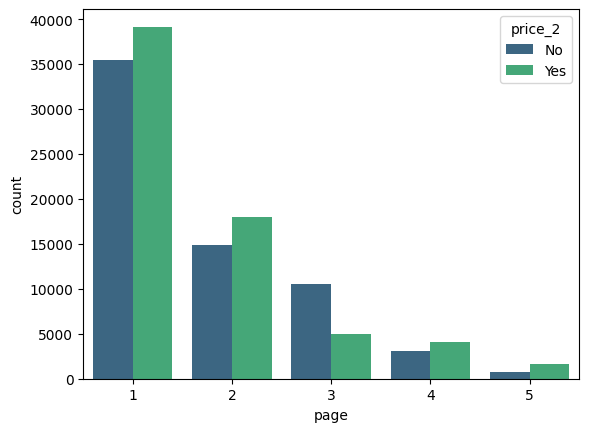

In [94]:
purch_done = pd.DataFrame(train_click_analyze.groupby(['page','price_2']).agg(count=('price_2','count')))
purch_done.reset_index(inplace=True)
sns.barplot(purch_done,x='page',y='count',hue='price_2',palette='viridis')
plt.show()

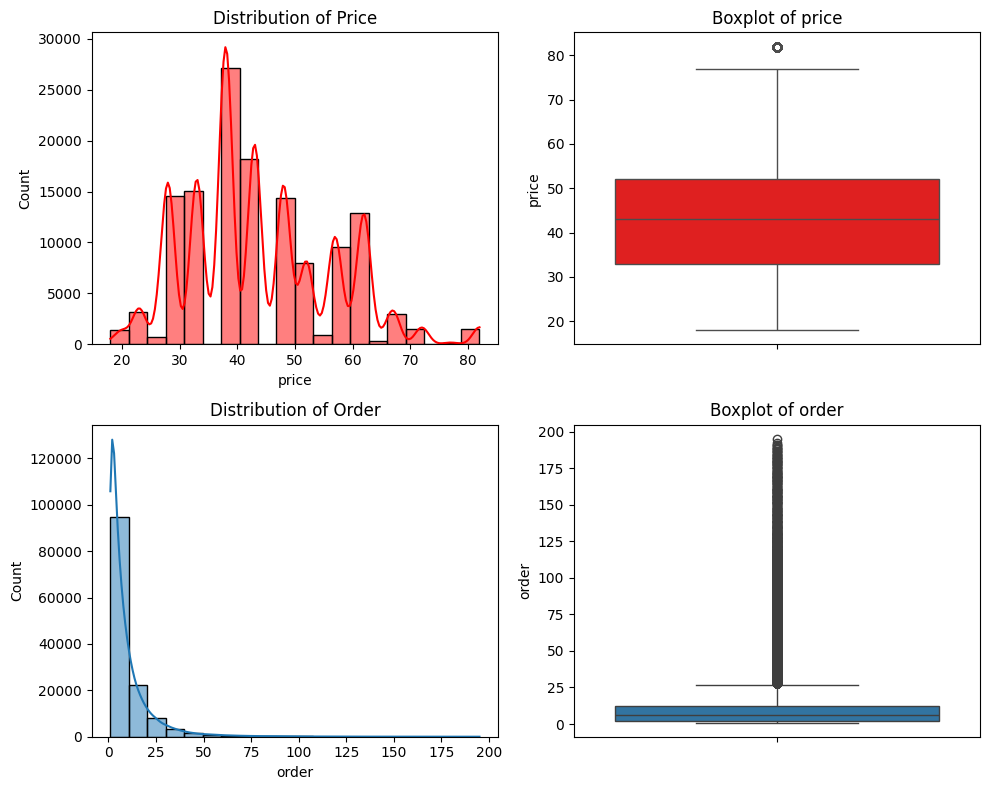

In [95]:
# Price distribution
fig,ax = plt.subplots(2,2,figsize=(10,8))

sns.histplot(train_click_analyze['price'],bins=20,kde=True,color='red',ax=ax[0,0])
ax[0,0].set_title('Distribution of Price')
sns.boxplot(train_click_analyze['price'],color='red',ax=ax[0,1])
ax[0,1].set_title('Boxplot of price')

sns.histplot(train_click_analyze['order'],bins=20,kde=True,ax=ax[1,0])
ax[1,0].set_title('Distribution of Order')
sns.boxplot(train_click_analyze['order'],ax=ax[1,1])
ax[1,1].set_title('Boxplot of order')

plt.tight_layout()
plt.show()

In [96]:
train_click_analyze['order_log'] = np.log1p(train_click['order']) 
train_click['order_log'] = train_click_analyze['order_log']

**************************************************After Log Transformation**************************************************


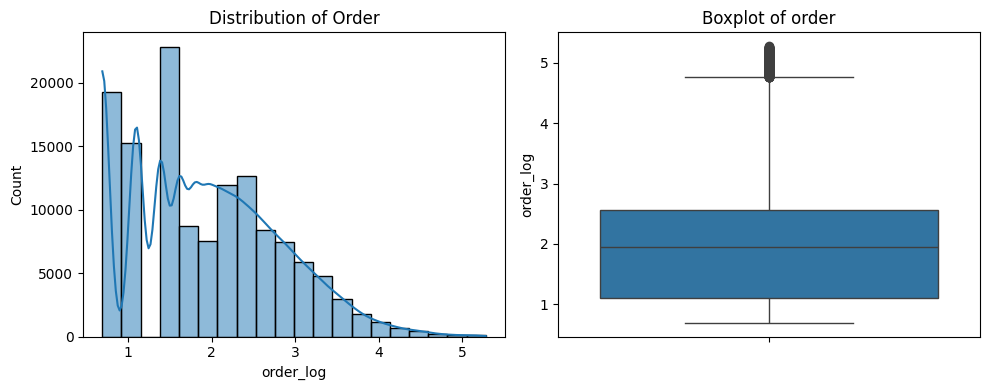

In [97]:
print('*'*50+'After Log Transformation'+'*'*50)
fig,ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(train_click_analyze['order_log'],bins=20,kde=True,ax=ax[0])
ax[0].set_title('Distribution of Order')
sns.boxplot(train_click_analyze['order_log'],ax=ax[1])
ax[1].set_title('Boxplot of order')
plt.tight_layout()
plt.show()

In [98]:
month_map = {
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August"
}
train_click_analyze.month = train_click_analyze.month.map(month_map)

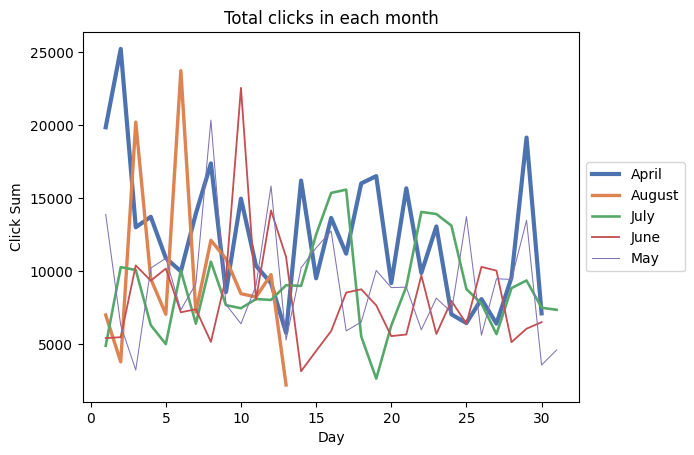

In [99]:
day_ord = train_click_analyze.groupby(['month','day']).agg(click_sum=('order','sum'))
day_ord.reset_index(inplace=True)
sns.lineplot(day_ord,x='day',y='click_sum',hue='month',size='month',palette='deep')
plt.xlabel('Day')
plt.ylabel('Click Sum')
plt.title('Total clicks in each month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Feature Engineering

### Number of Clicks per session

In [100]:
clicks_per_session = train_click[train_click.price_2==1].groupby("session_id")["order"].max()
clicks_per_session

session_id
1         9
2        10
3         5
4         3
5         1
         ..
24020     5
24021     5
24024     1
24025     1
24026     3
Name: order, Length: 18761, dtype: int64

In [101]:
clicks_per_session = train_click[train_click.price_2==2].groupby("session_id")["order"].max()
clicks_per_session

session_id
1        7
2        6
3        1
4        4
6        3
        ..
24020    1
24021    4
24022    3
24023    6
24026    1
Name: order, Length: 18248, dtype: int64

### Sequence of Clicks

In [102]:
click_paths = train_click[train_click.price_2==1].groupby("session_id")["page"].apply(list)
click_paths

session_id
1              [1, 5, 4, 1, 4]
2        [2, 2, 2, 2, 1, 2, 2]
3                       [1, 1]
4                       [1, 3]
5                          [2]
                 ...          
24020                [2, 1, 2]
24021                   [1, 1]
24024                      [1]
24025                      [1]
24026                   [1, 1]
Name: page, Length: 18761, dtype: object

In [103]:
click_paths = train_click[train_click.price_2==2].groupby("session_id")["page"].apply(list)
click_paths

session_id
1           [1, 1, 4]
2              [1, 1]
3                 [1]
4              [2, 2]
6              [1, 3]
             ...     
24020             [1]
24021          [1, 1]
24022          [1, 1]
24023    [1, 1, 1, 1]
24026             [1]
Name: page, Length: 18248, dtype: object

### Bounce rate

In [104]:
clicks_per_session = train_click[train_click.price_2==1].groupby("session_id")["order"].max()
bounced_sessions = clicks_per_session[clicks_per_session == 1]
bounce_rate = len(bounced_sessions) / len(clicks_per_session)
print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 18.43%


In [105]:
clicks_per_session = train_click[train_click.price_2==2].groupby("session_id")["order"].max()
bounced_sessions = clicks_per_session[clicks_per_session == 1]
bounce_rate = len(bounced_sessions) / len(clicks_per_session)
print(f"Bounce Rate: {bounce_rate:.2%}")

Bounce Rate: 18.64%


### Exit rates

In [106]:
last_clicks = train_click[train_click.price_2==1].loc[train_click[train_click.price_2==1].groupby("session_id")["order"].idxmax()]
exit_counts = last_clicks["page"].value_counts()
exit_rate = exit_counts / train_click[train_click.price_2==1]["page"].value_counts()
exit_rate = exit_rate.fillna(0)
exit_rate

1    0.272165
2    0.275272
3    0.257253
4    0.307235
5    0.403155
Name: page, dtype: float64

In [107]:
last_clicks = train_click[train_click.price_2==2].loc[train_click[train_click.price_2==2].groupby("session_id")["order"].idxmax()]
exit_counts = last_clicks["page"].value_counts()
exit_rate = exit_counts / train_click[train_click.price_2==1]["page"].value_counts()
exit_rate = exit_rate.fillna(0)
exit_rate

1    0.251864
2    0.219618
3    0.612700
4    0.275768
5    0.188013
Name: page, dtype: float64

### Revisit patterns

In [108]:
# For each session, count duplicates
def has_revisit(group):
    return group["page"].duplicated().any()

revisit_sessions = train_click[train_click.price_2==1].groupby("session_id").apply(has_revisit)

# Revisit rate
revisit_rate = revisit_sessions.sum() / revisit_sessions.count()
print(f"Revisit Rate: {revisit_rate:.2%}")

Revisit Rate: 57.69%


In [109]:
revisit_sessions = train_click[train_click.price_2==2].groupby("session_id").apply(has_revisit)

# Revisit rate
revisit_rate = revisit_sessions.sum() / revisit_sessions.count()
print(f"Revisit Rate: {revisit_rate:.2%}")

Revisit Rate: 56.12%


## Clustering

In [111]:
train_click_cluster = train_click.copy()

In [112]:
train_click_cluster.drop('order',axis=1,inplace=True)

In [113]:
# For clustering, groupby based on session_id
train_click_cluster['date'] = pd.to_datetime(dict(year=train_click_cluster.year,
                                                  month=train_click_cluster.month,
                                                  day=train_click_cluster.day))

In [114]:
cluster_click = train_click_cluster.groupby('session_id').agg({
    'date': lambda x: x.mode().iloc[0],
    'price': 'mean',
    'page': 'median',
    'order_log': 'median',
    'country': lambda x: x.mode().iloc[0],
    'page1_main_category': lambda x: x.mode().iloc[0],
    'colour': lambda x: x.mode().iloc[0],
    'location': lambda x: x.mode().iloc[0],
    'model_photography': lambda x: x.mode().iloc[0],
    'price_2': lambda x: x.mode().iloc[0],
})

In [115]:
cluster_click['month'] = cluster_click['date'].dt.month
cluster_click['day'] = cluster_click['date'].dt.day

In [116]:
cluster_click.drop('date',axis=1,inplace=True)

In [117]:
clicks_per_session = train_click_cluster.groupby("session_id")["order_log"].max()
clicks_per_session = pd.DataFrame(clicks_per_session)
clicks_per_session = clicks_per_session.rename(columns={'order_log':'clicks_per_session'})

In [118]:
cluster_click = pd.concat([cluster_click,clicks_per_session],axis=1)

In [123]:
from sklearn.preprocessing import StandardScaler
clust_sc = StandardScaler()
cluster_scaled = pd.DataFrame(clust_sc.fit_transform(cluster_click),columns=cluster_click.columns,index=cluster_click.index)

### Clustering Model - 1

In [121]:
!pip install yellowbrick

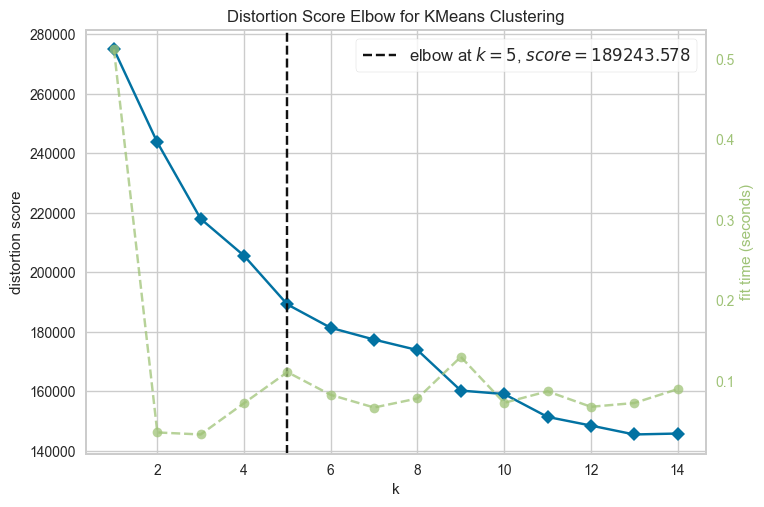

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [124]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
km = KMeans()
vsl = KElbowVisualizer(km,k=(1,15))
vsl.fit(cluster_scaled)
vsl.show()

In [ ]:
#km = KMeans(n_clusters=5,random_state = 42)
#labels = km.fit_predict(cluster_scaled)
#print("Silhouette Score",silhouette_score(cluster_scaled,labels))
#print("DBI score",davies_bouldin_score(cluster_scaled,labels))

In [ ]:
#from umap.umap_ import UMAP
#umap = UMAP(n_components=8)
#cluster_umap = umap.fit_transform(cluster_scaled)
#km = KMeans(n_clusters=5,random_state = 42)
#labels = km.fit_predict(cluster_umap)
#print("Silhouette Score",silhouette_score(cluster_umap,labels))
#print("DBI score",davies_bouldin_score(cluster_umap,labels))

In [128]:
from sklearn.pipeline import Pipeline
from umap.umap_ import UMAP
cluster_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('umap',UMAP(n_components=8)),
    ('cluster',KMeans(n_clusters=5,random_state = 42))
])
labels = cluster_pipeline.fit_predict(cluster_click)
cluster_umap = cluster_pipeline.named_steps['umap'].transform(
    cluster_pipeline.named_steps['scaler'].transform(cluster_click)
) 
print("Silhouette Score",silhouette_score(cluster_umap,labels))
print("DBI score",davies_bouldin_score(cluster_umap,labels))

Silhouette Score 0.70254904
DBI score 0.3731254699317722


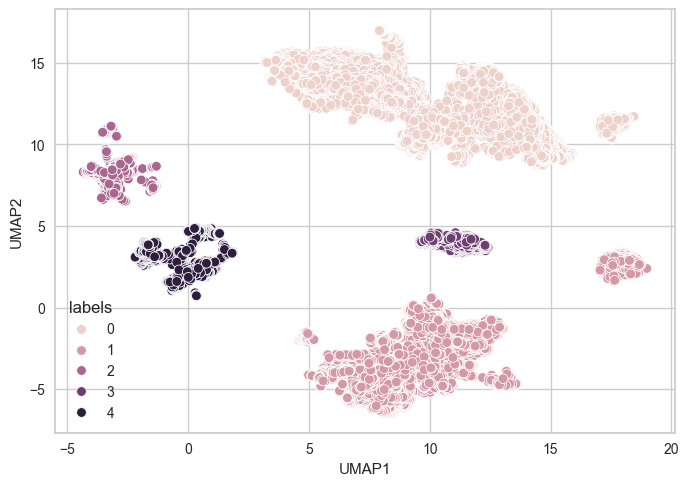

In [129]:
reducer = UMAP(n_components=2)
cluster_umap_vis = reducer.fit_transform(cluster_scaled)
cluster_umap_vis = pd.DataFrame(cluster_umap_vis,columns=["UMAP1","UMAP2"])
cluster_umap_vis['labels'] = labels
sns.scatterplot(cluster_umap_vis,x="UMAP1",y="UMAP2",hue='labels')
plt.show()

In [130]:
import joblib
# Save the cluster model
#joblib.dump(km,"Cluster_best.pkl")

# Save the dim reducer
#joblib.dump(umap,"Umap_reducer.pkl")

# Save the scaler
#joblib.dump(clust_sc,"Scale_cluster.pkl")

# save the pipeline
joblib.dump(cluster_pipeline,'Cluster_pipeline.pkl')

['Cluster_pipeline.pkl']

In [131]:
train_click.to_csv("New_train_click.csv",index=False)

### Data Visualisation (After Clustering)

In [132]:
cluster_click['Cluster_group'] = labels

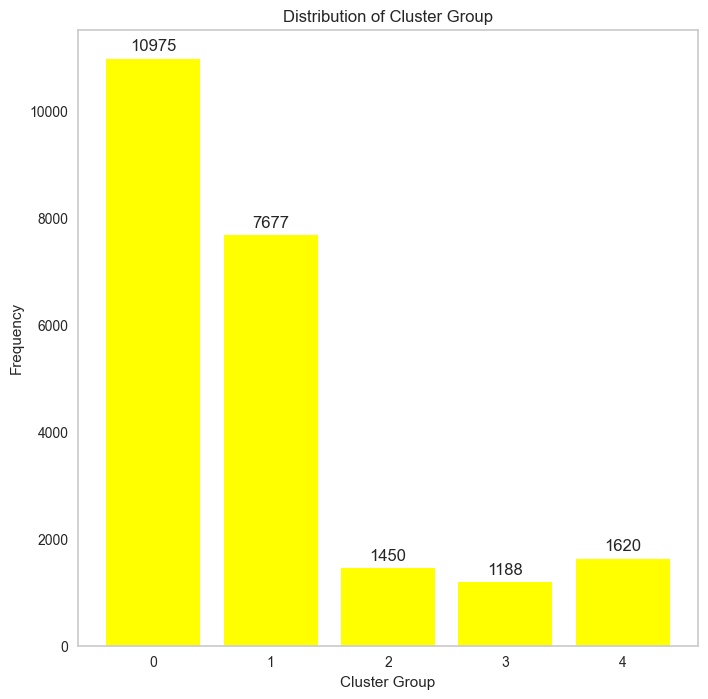

In [133]:
# Assuming you have this data:
cluster_counts = cluster_click['Cluster_group'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8, 8))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='yellow')

# Add text **on top** of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 100,  
             f'{int(height)}', ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Cluster Group')
plt.xlabel('Cluster Group')
plt.ylabel('Frequency')
plt.grid(False) 
plt.show()

In [134]:
cluster_summary = cluster_click.copy()

In [135]:
# Replace country 
cluster_summary.country = cluster_summary.country.replace(country_mapping)

# Product category
cluster_summary.page1_main_category = cluster_summary.page1_main_category.replace(product_category)

# Colour
cluster_summary.colour = cluster_summary.colour.replace(color_mapping)

# Location
cluster_summary.location = cluster_summary.location.replace(loc_mapping)

# Model Photography
cluster_summary.model_photography = cluster_summary.model_photography.replace(model_phot)

# Price 2 
cluster_summary.price_2 = cluster_summary.price_2.replace(purch)

In [136]:
cluster_summary['date'] = pd.to_datetime(dict(year=2008,month=cluster_summary.month,day=cluster_summary.day))

In [137]:
cluster_summary.drop(['month','day'],axis=1,inplace=True)

In [138]:
cluster_summary['order'] = np.expm1(cluster_summary['order_log'])

In [139]:
cluster_summary.drop('order_log',axis=1,inplace=True)

In [140]:
categ = cluster_summary.select_dtypes(include=['object','datetime'])

In [141]:
numeric = cluster_summary.select_dtypes(include='number')
numeric.drop('Cluster_group',axis=1,inplace=True)

In [142]:
cluster_numerical_summary = cluster_summary.groupby('Cluster_group').agg(price=('price','mean'),
                                                                         order=('order','median'),
                                                                         page=('page','median'))
cluster_categorical_summary = cluster_summary.groupby('Cluster_group')[categ.columns.to_list()].agg(lambda x: x.mode().iloc[0])

In [143]:
final_summary = pd.concat([cluster_numerical_summary,cluster_categorical_summary],axis=1)

In [144]:
final_summary

,price,order,page,country,page1_main_category,colour,location,model_photography,price_2,date
Cluster_group,,,,,,,,,,
0,48.479424,2.464102,1.0,Poland,skirts,black,top left,en face,Yes,2008-04-01
1,39.188090,3.000000,1.0,Poland,trousers,blue,top left,en face,No,2008-04-01
2,46.685318,2.000000,1.5,Poland,sale,black,top left,profile,Yes,2008-04-02
3,50.747001,3.000000,1.0,Czech Republic,trousers,blue,top left,en face,Yes,2008-04-02
4,34.323736,1.828427,1.0,Poland,trousers,white,top in the middle,profile,No,2008-04-02


## Regression

In [145]:
train_click_regress = train_click.copy()

In [147]:
train_click_regress.drop(['year','order','price_2'],axis=1,inplace=True)

In [148]:
train_click_regress.drop(['session_id','page2_clothing_model'],axis=1,inplace=True)

In [149]:
X = train_click_regress.drop('price',axis=1)
Y = train_click_regress['price']

In [ ]:
#from sklearn.preprocessing import StandardScaler
#regress_sc = StandardScaler()
#X_sc = regress_sc.fit_transform(X.values)

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### ML Model - 1

In [152]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
lr_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('regression',LinearRegression())
])
# Fit the model
lr_pipeline.fit(X_train,Y_train)

# Predict the test
Y_trpred = lr_pipeline.predict(X_train)
Y_pred = lr_pipeline.predict(X_test)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 11.50305237446805
Train R2 0.15675034836527846
Test RMSE 11.557046622241229
Test R2 0.15735467061043673


### ML Model - 2

In [153]:
lasso_pipeline = Pipeline([
  ('scaler',StandardScaler()),
  ('regress',Lasso())
])
# Fit the model
lasso_pipeline.fit(X_train,Y_train)

# Predict the test
Y_trpred = lasso_pipeline.predict(X_train)
Y_pred = lasso_pipeline.predict(X_test)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 11.608663957759164
Train R2 0.14119521539371227
Test RMSE 11.666450475031436
Test R2 0.14132549000752903


### ML Model - 3

In [154]:
ridge_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('regress',Ridge())
])
# Fit the model
ridge_pipeline.fit(X_train,Y_train)

# Predict the test
Y_trpred = ridge_pipeline.predict(X_train)
Y_pred = ridge_pipeline.predict(X_test)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 11.503052374555999
Train R2 0.15675034835238388
Test RMSE 11.557046692891225
Test R2 0.15735466030799694


### ML Model - 4

In [155]:
from xgboost import XGBRegressor
xgb_pipeline = Pipeline([
  ('scaler',StandardScaler()),
  ('regress',XGBRegressor())
]) 
# Fit the model
xgb_pipeline.fit(X_train,Y_train)

# Predict the test
Y_trpred = xgb_pipeline.predict(X_train)
Y_pred = xgb_pipeline.predict(X_test)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 5.297148770743281
Train R2 0.8211807012557983
Test RMSE 5.496240214121909
Test R2 0.809417724609375


#### Hyperparameter Tuning

In [160]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'regress__n_estimators': [100, 300, 500],
    'regress__max_depth': [3, 5, 7],
    'regress__learning_rate': [0.01, 0.05, 0.1],
    'regress__subsample': [0.6, 0.8, 1.0],
    'regress__colsample_bytree': [0.6, 0.8, 1.0],
    'regress__reg_alpha': [0, 0.1, 0.5],
    'regress__reg_lambda': [0.5, 1.0]
}

gs = GridSearchCV(xgb_pipeline, param_grid=param_grid, 
                        scoring='neg_root_mean_squared_error',
                        cv=3, verbose=2, n_jobs=-1)

gs.fit(X_train, Y_train)

In [159]:
print("Best Parameters:", gs.best_params_)

Best Parameters: {'regress__colsample_bytree': 1.0, 'regress__learning_rate': 0.05, 'regress__max_depth': 7, 'regress__n_estimators': 300, 'regress__reg_alpha': 0, 'regress__reg_lambda': 1.0, 'regress__subsample': 1.0}


In [161]:
best_xgb_pipeline = gs.best_estimator_
Y_trpred = best_xgb_pipeline.predict(X_train)
Y_pred = best_xgb_pipeline.predict(X_test)
print("Train RMSE",np.sqrt(mean_squared_error(Y_train,Y_trpred)))
print("Train R2",r2_score(Y_train,Y_trpred))
print("Test RMSE",np.sqrt(mean_squared_error(Y_test,Y_pred)))
print("Test R2",r2_score(Y_test,Y_pred))

Train RMSE 5.315515511291189
Train R2 0.8199385404586792
Test RMSE 5.484767639481725
Test R2 0.8102124929428101


In [163]:
# pickle to save the models
import joblib
# Save model
#joblib.dump(best_xgb,"XGBoost_regress.pkl")
# Save Scaler
#joblib.dump(regress_sc,"Regress_scale.pkl")

# Save the pipeline
joblib.dump(best_xgb_pipeline,'Regression_pipeline.pkl')

['Regression_pipeline.pkl']

## Classification

In [164]:
train_click = pd.read_csv("New_train_click.csv")

In [165]:
train_click_class = train_click.copy()

In [167]:
train_click_class.drop(['year','order','session_id','page2_clothing_model'],axis=1,inplace=True)

In [168]:
train_click_class.price_2 = train_click_class.price_2.map({1:1,2:0})

In [169]:
X = train_click_class.drop('price_2',axis=1)
Y = train_click_class['price_2']

In [ ]:
#from sklearn.preprocessing import StandardScaler
#class_sc = StandardScaler()
#X_sc = class_sc.fit_transform(X.values)

In [170]:
Y.value_counts()

1    67714
0    64665
Name: price_2, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

### Model - 1

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score

Log_reg_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('logistic',LogisticRegression())
]) 
# Fit the model
Log_reg_pipeline.fit(X_train, Y_train)

# Make predictions
Y_trpred = Log_reg_pipeline.predict(X_train)
Y_pred = Log_reg_pipeline.predict(X_test)
print("*"*50+'Train Set'+"*"*50)
print(classification_report(Y_train,Y_trpred))
print("*"*50+'Test Set'+"*"*50)
print(classification_report(Y_test,Y_pred))

**************************************************Train Set**************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51745
           1       0.99      1.00      0.99     54158

    accuracy                           0.99    105903
   macro avg       0.99      0.99      0.99    105903
weighted avg       0.99      0.99      0.99    105903

**************************************************Test Set**************************************************
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     12920
           1       0.99      1.00      0.99     13556

    accuracy                           0.99     26476
   macro avg       0.99      0.99      0.99     26476
weighted avg       0.99      0.99      0.99     26476



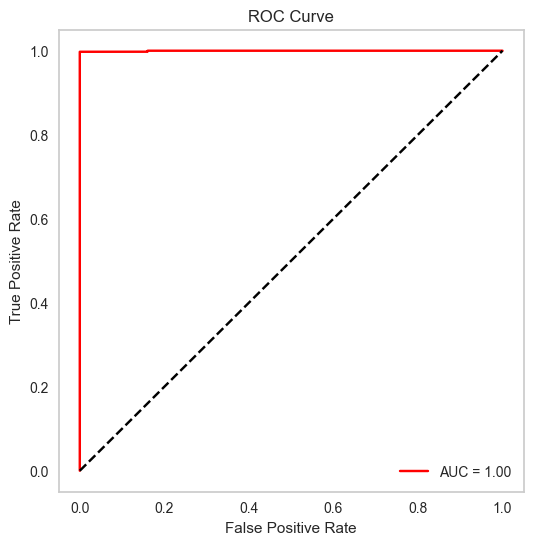

In [174]:
Y_pred_prob = Log_reg_pipeline.predict_proba(X_test)[:,1]
# AUC score
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
roc_auc = roc_auc_score(Y_test, Y_pred_prob)
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}',color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(False)
plt.show()

#### Cross Validation

In [175]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(Log_reg_pipeline, X_train, Y_train, cv=10, scoring='accuracy')

print("Cross-validation accuracy scores:", scores)
print("Mean Accuracy:", scores.mean())

Cross-validation accuracy scores: [0.9928241  0.99320178 0.99169106 0.99225685 0.99480642 0.99254013
 0.99348442 0.99291785 0.99320113 0.9917847 ]
Mean Accuracy: 0.9928708430884846


In [176]:
# Pickle to save the models
import joblib

# Save the model
#joblib.dump(Log_reg,"Classify_logistic.pkl")

# Save the scaler
#joblib.dump(class_sc,"Classify_scaler.pkl")

#Save the pipeline
joblib.dump(Log_reg_pipeline,'Classification_pipeline.pkl')

['Classification_pipeline.pkl']